[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W3/W3P4.ipynb)

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import os


In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")


def to_dataframe(text: str):  ### this dude will convert *.txt file to a dataframe
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Panda dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    L = L.apply(pd.to_numeric)
    L.columns = headers
    print("Data was parsed succesfully!")
    return L

In [ ]:
download_data()
os.listdir()   ### make sure that you are at the right directory

--2022-10-15 13:13:40--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K  1.08MB/s    in 0.5s    

2022-10-15 13:13:41 (1.08 MB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /

['d-ibm3dx7008.txt',
 'q-gnp4710.txt',
 'q-gdp4708.txt',
 'w-gs1yr.txt',
 'm-baa-1911.txt',
 'm-3m4608.txt',
 'm-ibm3dx2608.txt',
 'm-aaa-1911.txt',
 'm-unrate-4811.txt',
 'd-vix0810.txt',
 'w-gs3yr.txt',
 'w-tb6ms.txt',
 'd-sp55008.txt',
 'd-aapl0305.txt',
 'm-dec125910-6111.txt',
 'w-tb3ms.txt',
 'q-GNPC96.txt',
 'm-ibm3dx2609.txt',
 'q-ko-earns8309.txt',
 'q-jnj-earns-9211.txt',
 'q-gdpc96.txt',
 'm-ibmsp6709.txt',
 'm-deciles08.txt',
 'm-dec12910.txt']

#Make sure that you run to_dataframe function before running the cell below.

In [ ]:
try:
    data = to_dataframe("q-gnp4710.txt") 
except Exception:
    print("Something is wrong with directories")

Data was parsed succesfully!


In [ ]:
data

,Year,Mon,Dat,VALUE
0,1947,1,1,238.1
1,1947,4,1,241.5
2,1947,7,1,245.6
3,1947,10,1,255.6
4,1948,1,1,261.7
...,...,...,...,...
248,2009,1,1,14172.2
249,2009,4,1,14164.2
250,2009,7,1,14281.9
251,2009,10,1,14442.8


In [ ]:
data_log =  data.iloc[:, -1].apply(np.log)   ###applying log transformation here

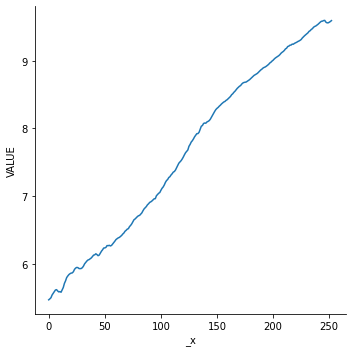

In [ ]:
sns.relplot(data = data_log, kind="line")  ### sketching the thing!

In [ ]:
data_log_diff = data_log.diff() ### the first difference

In [ ]:
data_log_diff = data_log_diff[1:] ### avoid N/A value

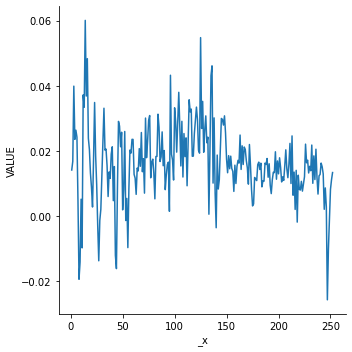

In [ ]:
sns.relplot(data = data_log_diff, kind="line",  legend = "auto") ### sketching the thing!

In [ ]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(endog = data_log_diff, order = (3,0,0))
fit_model = model.fit()

In [ ]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                  252
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 808.558
Date:                Mon, 26 Sep 2022   AIC                          -1607.117
Time:                        06:41:59   BIC                          -1589.470
Sample:                             0   HQIC                         -1600.016
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.001     13.251      0.000       0.014       0.019
ar.L1          0.4386      0.053      8.276      0.000       0.335       0.542
ar.L2          0.2062      0.055      3.759      0.000       0.099       0.314
ar.L3         -0.1560      0.048     -3.219      0.001      -0.251      -0.061
sigma2      9.546e-05    5.8e-06     16.467      0.000    8.41e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                63.74
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
poly = fit_model.polynomial_ar
print(poly)

[ 1.         -0.43855212 -0.20624455  0.15600667]


In [ ]:
pol = np.poly1d(np.flip(poly)) ### why do we flip here? what does flip do?
pol.r 

array([-1.90912413+0.j       ,  1.61557402+0.8645646j,
        1.61557402-0.8645646j])

In [ ]:
np.abs(pol.r)  ### the norms of roots of characteristic polynomial

array([1.90912413, 1.83236223, 1.83236223])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

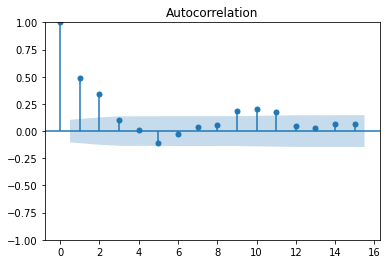

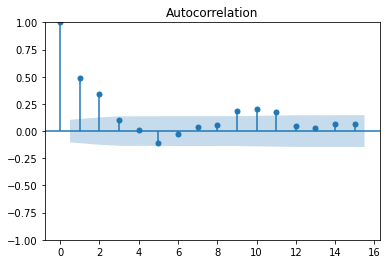

In [ ]:
plot_acf(data_log_diff, lags = 15, alpha = 0.1)

In [ ]:
def to_dataframe(text):
    """
    
    Parameters
    ----------
    text : this dude is a text file.

    Returns
    -------
    Panda dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers

    return L